In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/mpg.csv', index_col='Name')
df.head()

,MPG,Cylinders,Displacement,Horse_Power,Weight,Acceleration,Model_Year
Name,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70
buick skylark 320,15.0,8,350.0,165,3693,11.5,70
plymouth satellite,18.0,8,318.0,150,3436,11.0,70
amc rebel sst,16.0,8,304.0,150,3433,12.0,70
ford torino,17.0,8,302.0,140,3449,10.5,70


Text(-0.27, 45, 'LinReg Eq ..... y = 1.23x + -70.01 \nCorrelation ... 0.58')

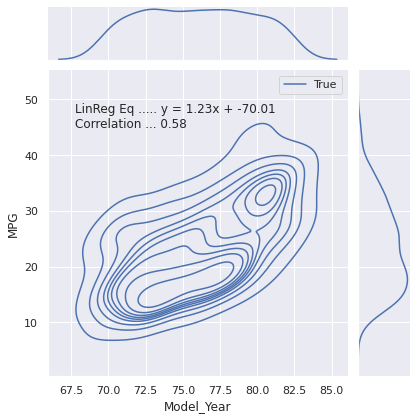

In [ ]:
import seaborn as sns

sns.set(color_codes=True)
sns.jointplot(x='Model_Year', y='MPG', data=df, kind='kde', hue=True)

m, b, r, p, err = stats.linregress(df.Model_Year, df.MPG)
textstr = f'LinReg Eq ..... y = {str(round(m, 2))}x + {str(round(b, 2))} \n'
textstr += f'Correlation ... {correlation}'
plt.text(-.27, 45, textstr, fontsize=12)


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='MPG', y='Weight', z='Displacement', color='Horse_Power', size='Cylinders')
fig.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='Model_Year~MPG', data=df).fit()

white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

output_df.round(3)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,LM stat,LM p-value,F-stat,F p-value
White,38.455,0.000,21.155,0.000
Breusch-Pagan,1.413,0.235,1.411,0.236
